<a href="https://colab.research.google.com/github/nehat005/Tensorflow_coding/blob/main/FashionMNIST_using_FCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify images of Clothing

Import Dependencies and python libraries

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 4.0 MB 2.7 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

import math
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.6.0


# Load and Transform the Dataset

In [3]:
mnist_data, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info=True)
train_data , test_data = mnist_data['train'], mnist_data['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling fashion_mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling fashion_mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


Metadata information about labels:

In [4]:
print(metadata)

print("No. of labels/classes in MNIST: {}".format(metadata.features['label'].num_classes))
print("10 classes are following: {}".format(metadata.features['label'].names))

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
    

In [5]:
classes = metadata.features['label'].names

**Explore the Data**

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of Training Examples = {}".format(num_train_examples))
print("Number of Test Examples = {}".format(num_test_examples))

Number of Training Examples = 60000
Number of Test Examples = 10000


**Preprocess the Data**

In [7]:
#Shape of Data: 

print(metadata.features['image'].shape)
print(metadata.features['label'].shape)

(28, 28, 1)
()


In [8]:
def normalise_data(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

#The map function applies the function normalise_data to each element in train and test data: 
train_data = train_data.map(normalise_data)
test_data = test_data.map(normalise_data)

**Explore The Processed Data**

Plotting the images to see what it looks like

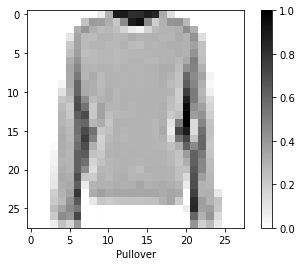

In [9]:
for image, label in train_data:
  break

image = image.reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.xlabel(classes[label])
plt.colorbar()
plt.show()

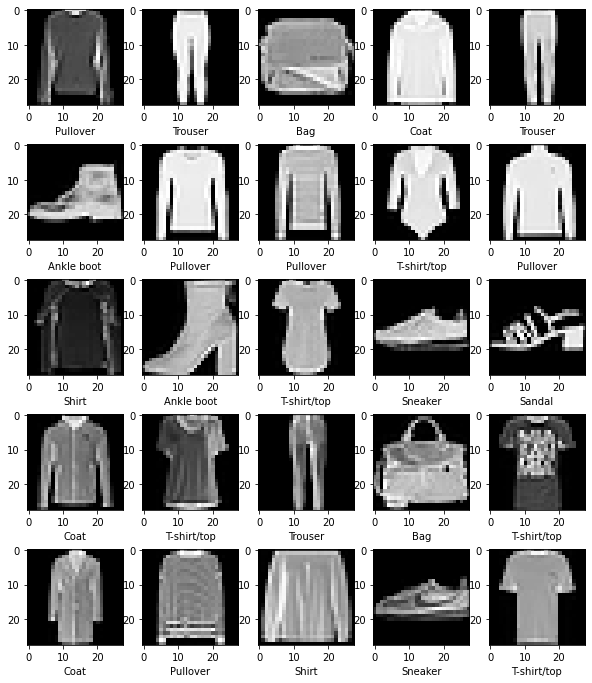

In [10]:
i = 0
plt.figure(figsize = (10,12))
if(i<=25):
  for (image, label) in train_data.take(25):
    image = image.reshape((28,28))
    plt.subplot(5, 5, i+1)
    plt.imshow(image, cmap = 'gray')
    plt.xlabel(classes[label])
    i += 1

plt.show()

# Build the Model

In [11]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')


**Train the model**

Iteration behaviour for the train data: 



1.   Repeat forever by data.repeat()
2.   Shuffle the Dataset
3.   Batch modelling using 32 samples at a time



In [13]:
Batch_Size = 32
train_data = train_data.shuffle(num_train_examples, seed = 0).batch(Batch_Size).repeat()
test_data = test_data.batch(Batch_Size)


In [14]:
history = model.fit(train_data, epochs = 10, steps_per_epoch=math.ceil(num_train_examples/Batch_Size))

Epoch 1/10
1875/1875 [==============================] - 10s 2ms/step - loss: 0.4964 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3766 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3400 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3139 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2946 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2803 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2679 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2570 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2467 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.23

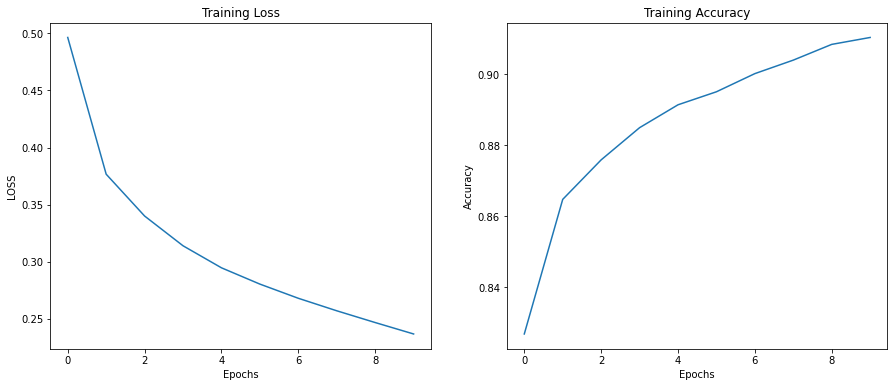

In [15]:
plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.title('Training Loss')
plt.plot(history.history['loss'])

plt.subplot(1, 2, 2)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.show()

# Evaluate accuracy on test set

In [16]:
test_loss, test_accuracy = model.evaluate(test_data, batch_size = Batch_Size, steps=math.ceil(num_test_examples/Batch_Size))
print("Accuracy on Test Set: {}".format(test_accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.3428 - accuracy: 0.8814
Accuracy on Test Set: 0.8813999891281128


In [18]:
for test_image, test_label in test_data.take(1):
  test_image = test_image.numpy()
  test_label = test_label.numpy()
  prediction = model.predict(test_image)

print(prediction.shape)
print(np.argmax(prediction[0]))

(32, 10)
4


In [19]:
print(test_label[0])

4
